This notebook contains all the code needed to generate a synthetic dataset.

All params handled in `src/config.py` `SYNTH` variable.
- Exits and funding are pulled from lognormal distr
- Ordinal founder attrs come from discrete pdfs in hyperparameter config.

Visualizations provided at the end to compare with expectations of real-world data.

Defining success as an exit or `config.SUCCESS_THRESHOLD` in funding. compute a raw score (which could be used to prioritize) and probability of success in `model.ipynb`.

In [1]:
import sys

sys.path.append("..")

from src.config.config import cfg
from src.datagen import datagen
from src.viz.data_viz import (
    plot_category_distribution_overall_and_by_pop,
    plot_hist_overall_and_by_pop, 
    visualize_successful_cases,
    load_batch_data,
    analyze_batch_data
)


### Generate dataset
Configure params in `src/config/config.SYNTH`

In [2]:
dg = datagen.DataGenerator() 

N = 5000
X_syn, exit_syn, fund_syn, pop_labels = dg.generate_dataset(N, cfg.SYNTH['POPULATIONS'])

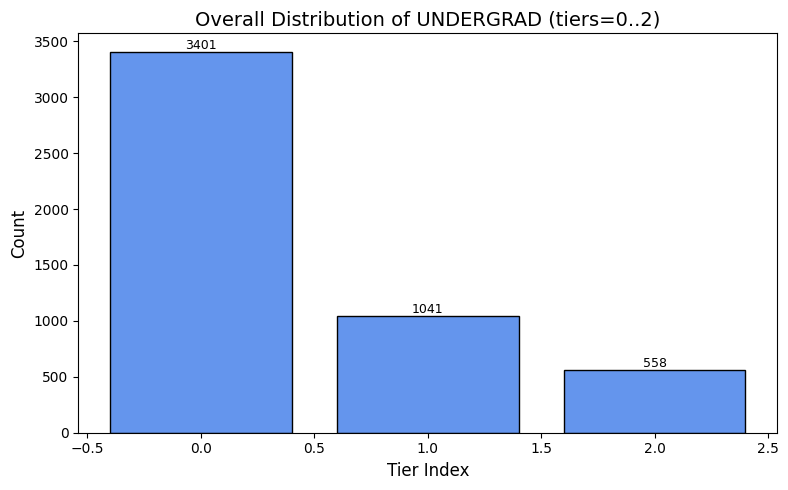

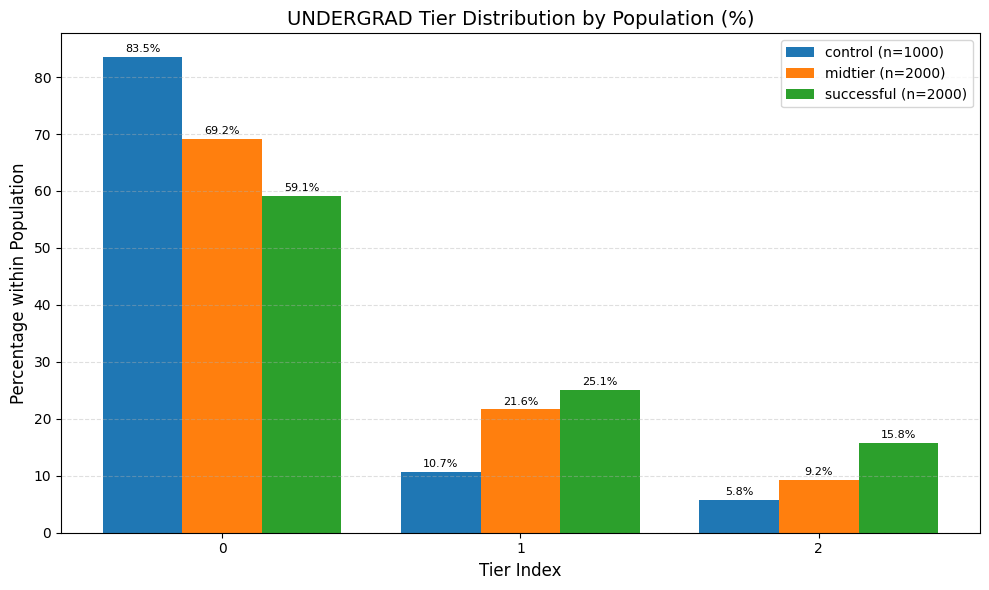

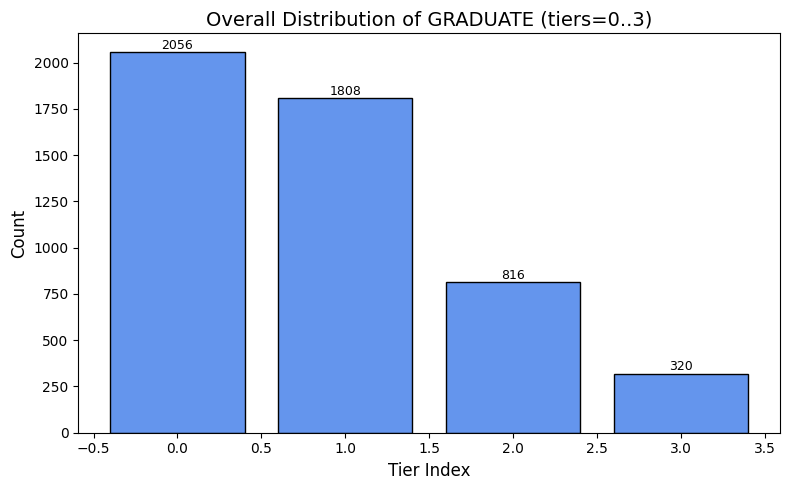

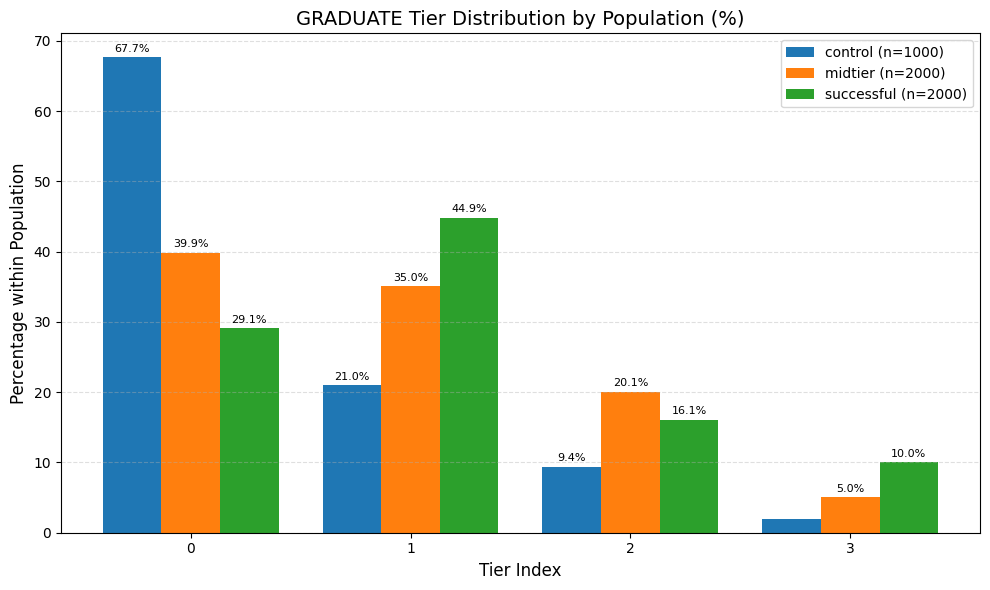

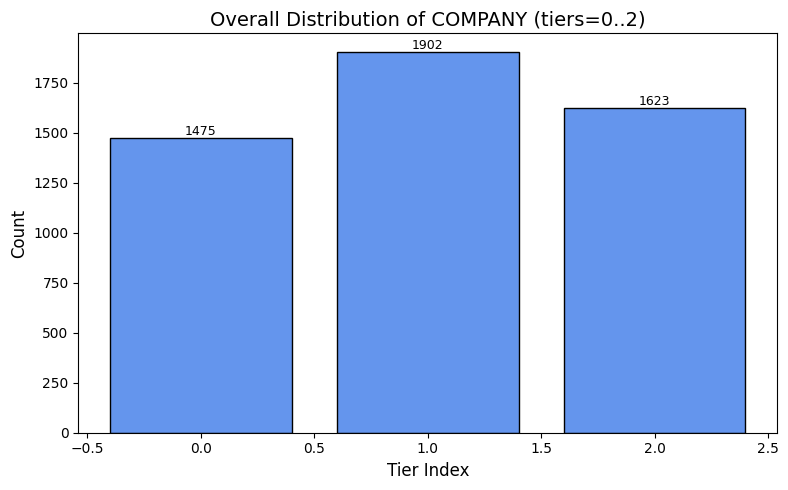

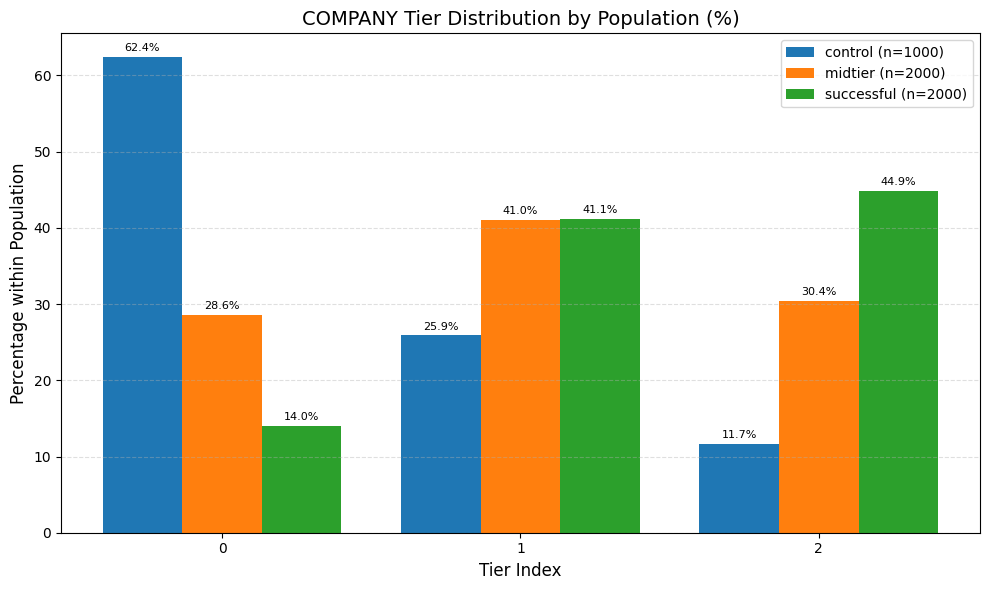

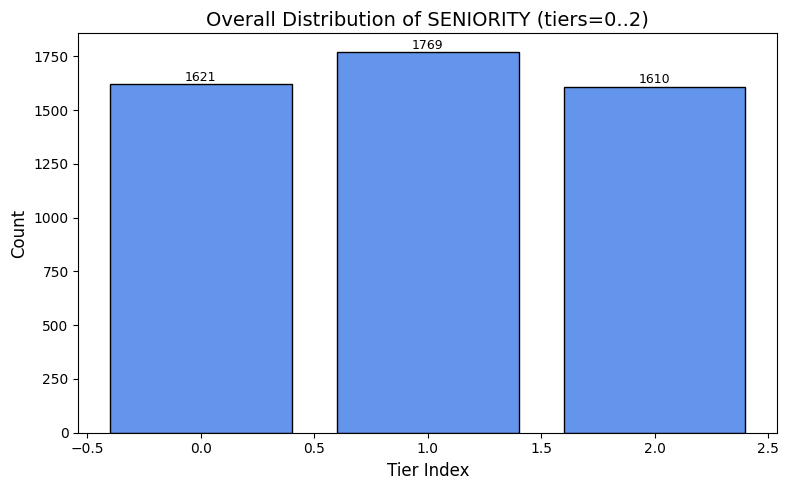

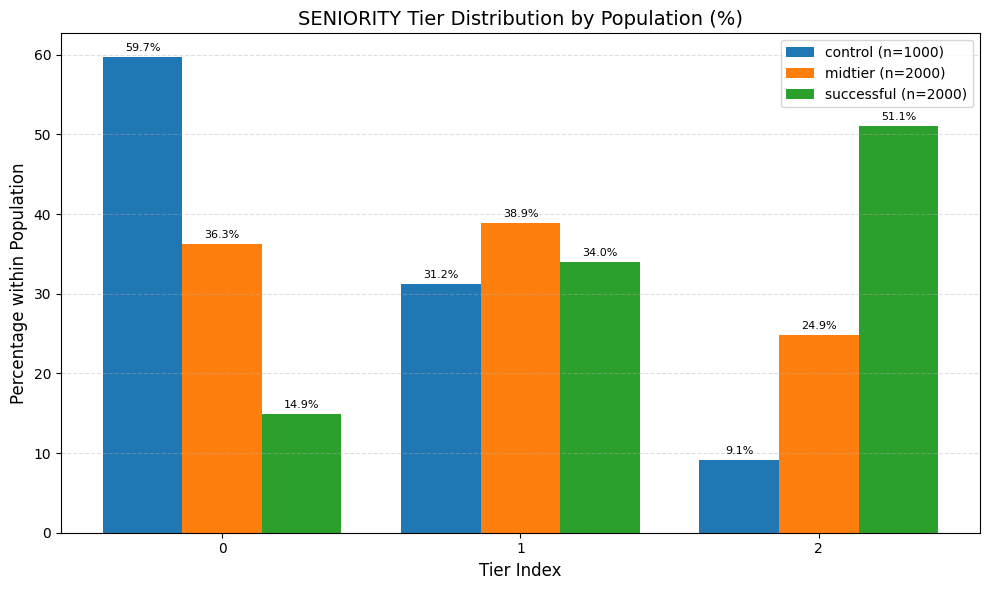

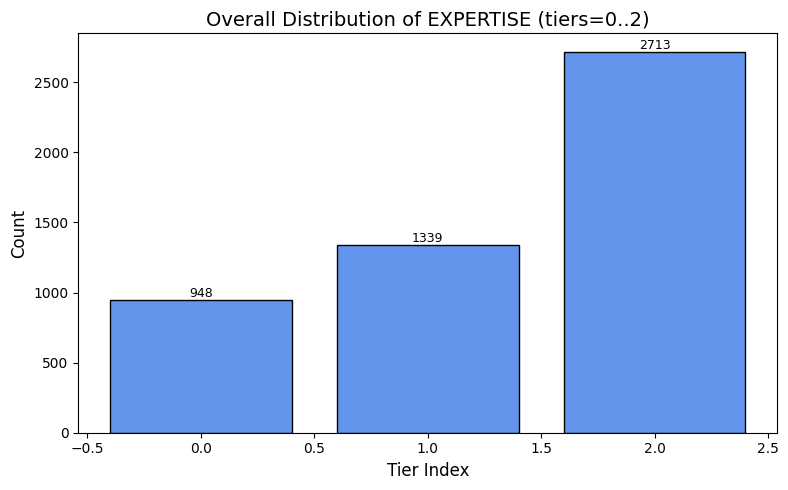

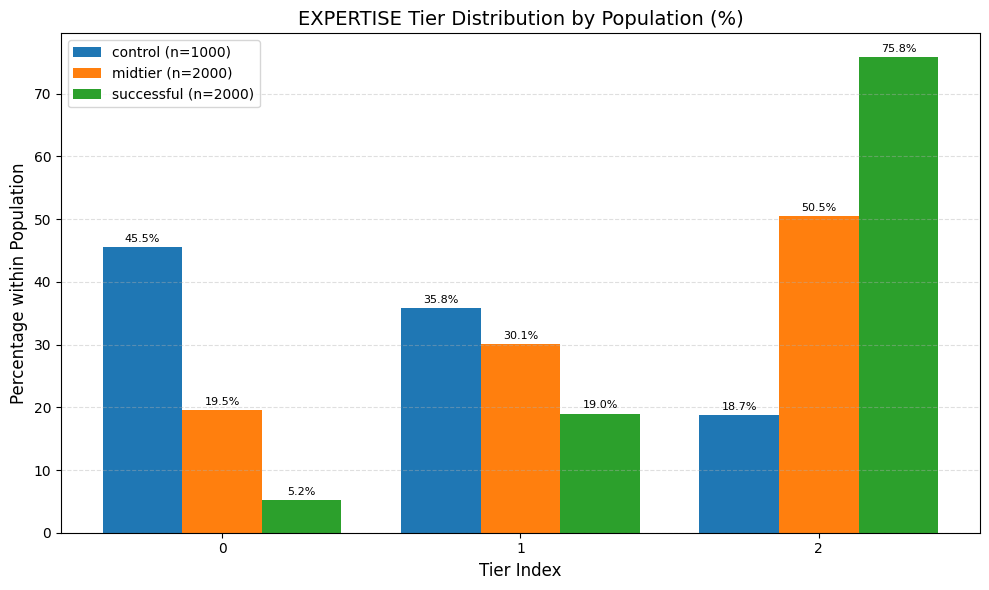

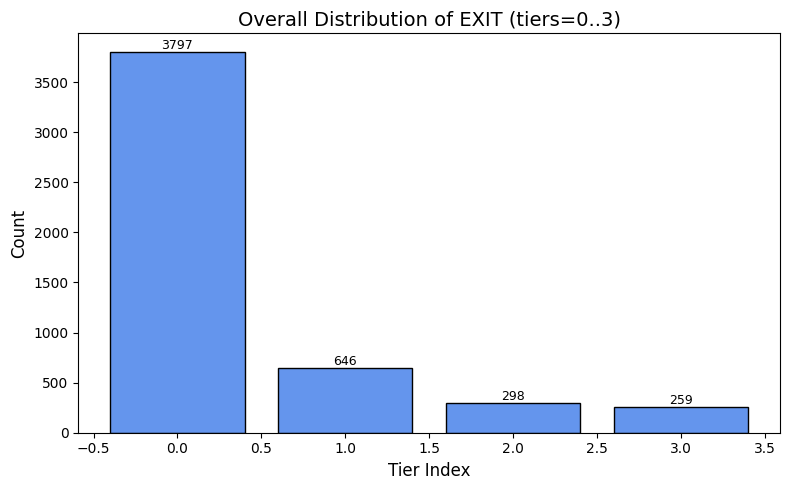

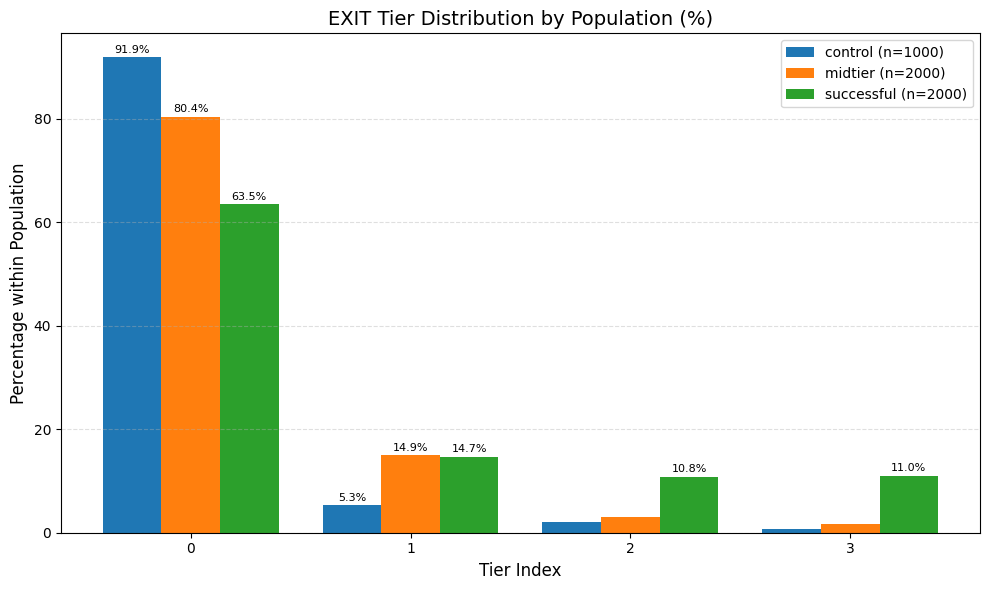

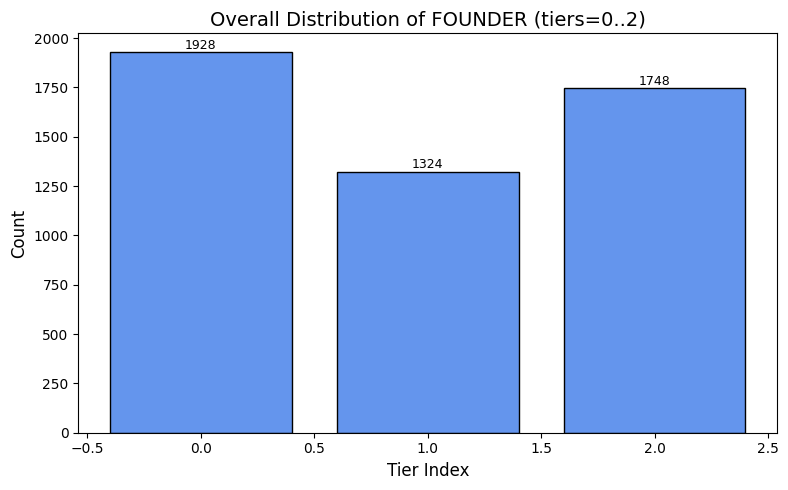

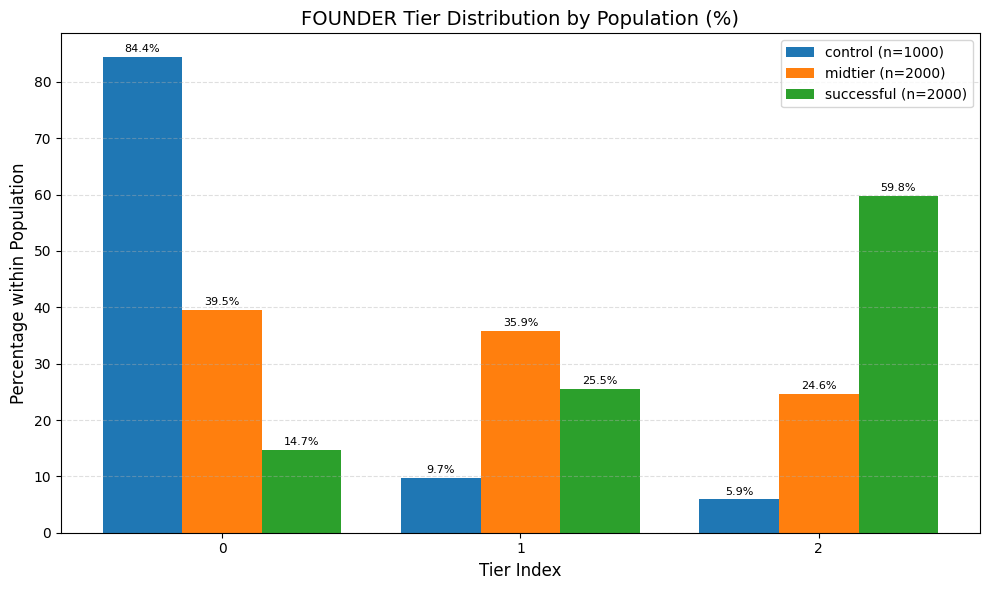

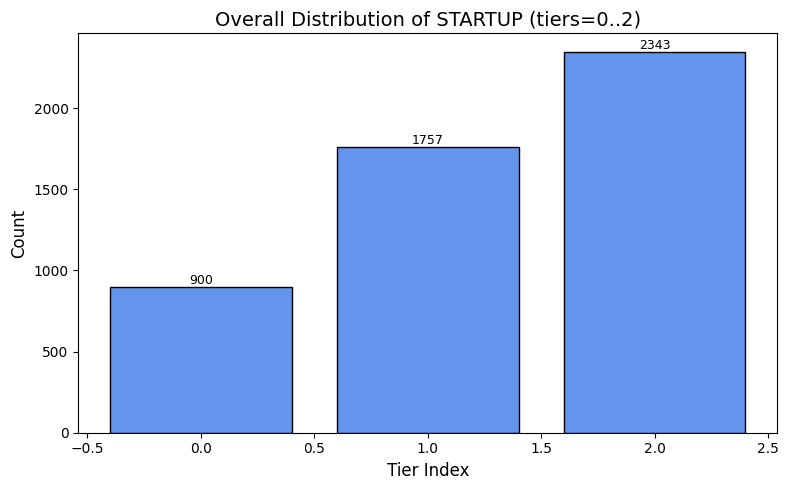

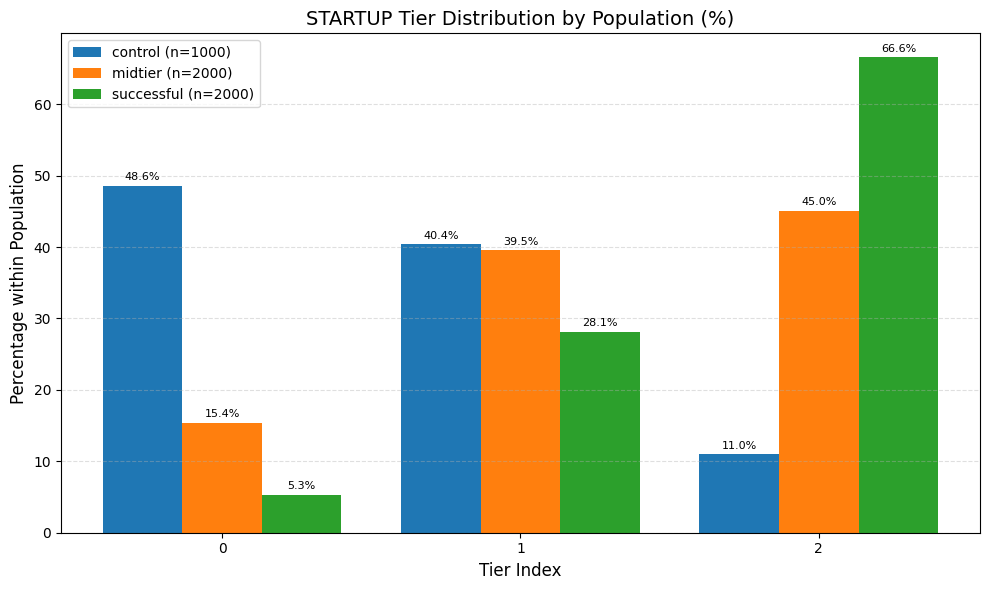

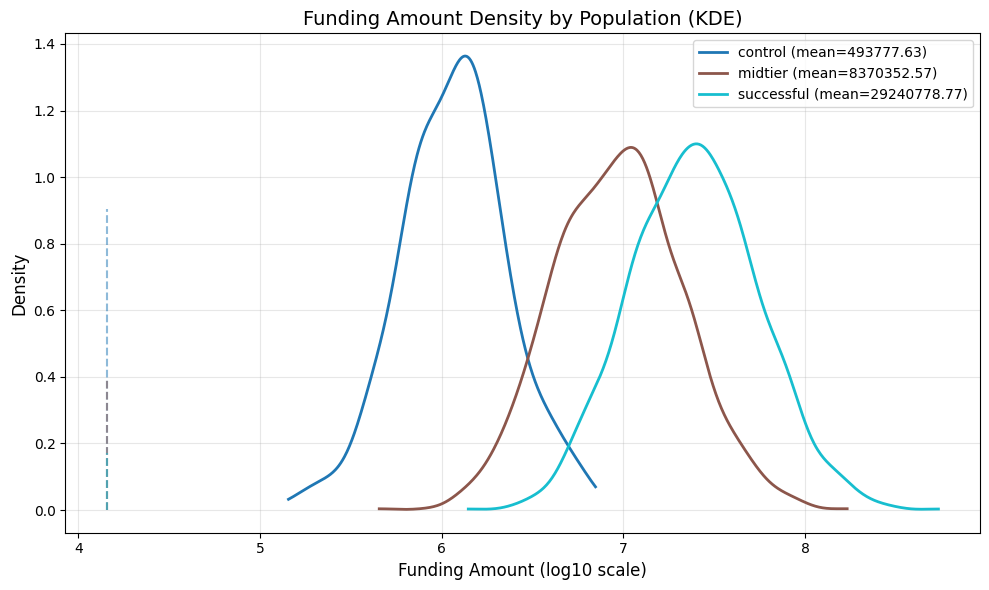

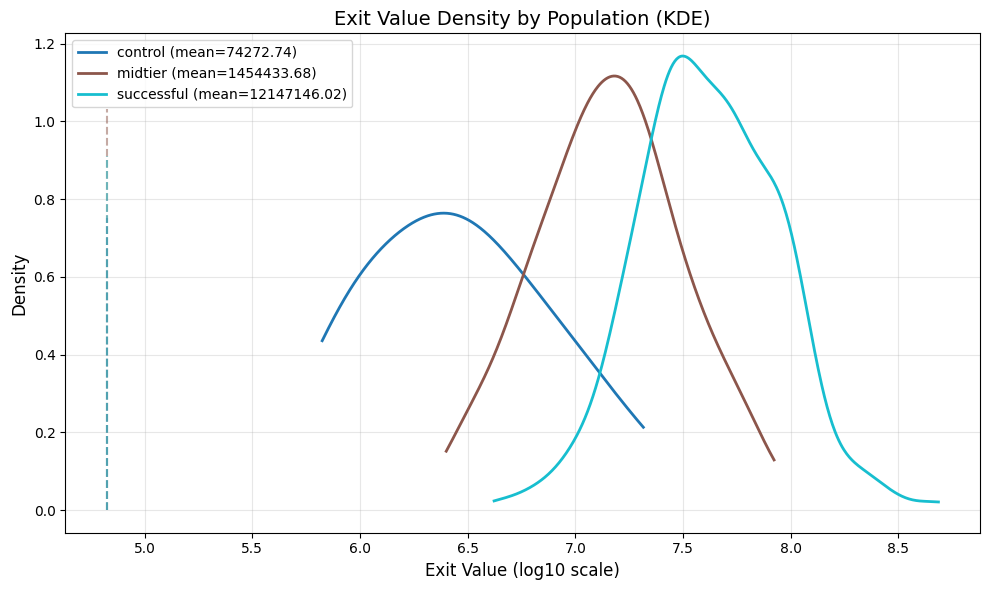

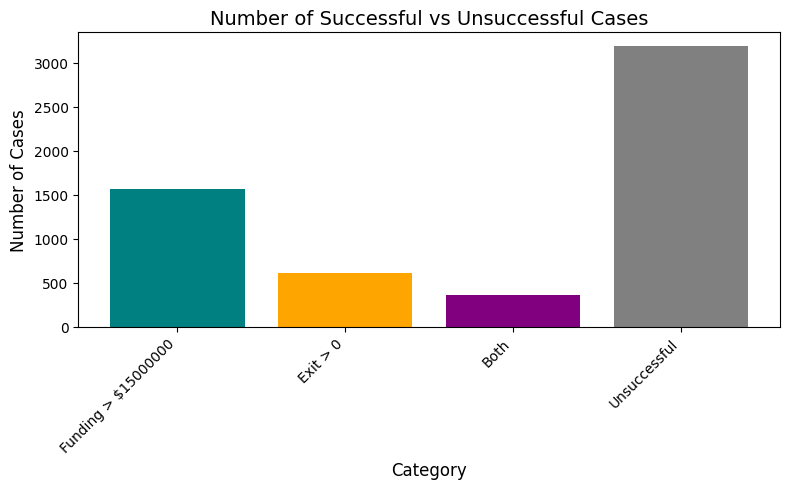

In [3]:


for cat_name in cfg.MATRIX.keys():
    plot_category_distribution_overall_and_by_pop(X_syn, pop_labels, cat_name)

plot_hist_overall_and_by_pop(fund_syn, pop_labels, title="Funding Amount", bins=50, log_scale=True)

plot_hist_overall_and_by_pop(exit_syn, pop_labels, title="Exit Value", bins=50, log_scale=True)

visualize_successful_cases(exit_syn, fund_syn)

### Save Dataset

In [4]:
df = dg.save_synthetic_dataset(
    X_syn, 
    exit_syn, 
    fund_syn, 
    cfg.MATRIX, 
    "../data/synth/encoded_founders_composites.csv", 
    success_funding_threshold=cfg.SUCCESS_FUNDING_THRESHOLD
)
df

,UNDERGRAD_1,UNDERGRAD_2,UNDERGRAD_3,GRADUATE_0,GRADUATE_1,GRADUATE_2,GRADUATE_3,COMPANY_1,COMPANY_2,COMPANY_3,...,EXIT_3,FOUNDER_1,FOUNDER_2,FOUNDER_3,STARTUP_1,STARTUP_2,STARTUP_3,exit_value,funding_amount,success
0,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0.0,9.792271e+06,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0.0,2.513412e+07,1
2,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0.0,2.510599e+07,1
3,1,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0.0,3.215532e+07,1
4,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0.0,2.187148e+07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,1,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0.0,0.000000e+00,0
4996,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0.0,1.304550e+06,0
4997,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0.0,7.888986e+05,0
4998,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0.0,0.000000e+00,0


### EDA for YC data


Basic Statistics:
Total samples: 1386

Samples per batch:
batch
S21              514
W21              465
top_companies    170
S17              123
W17              114
Name: count, dtype: int64

Success rate by batch:
batch
S17              0.479675
S21              0.198444
W17              0.421053
W21              0.286022
top_companies    0.958824
Name: success, dtype: float64


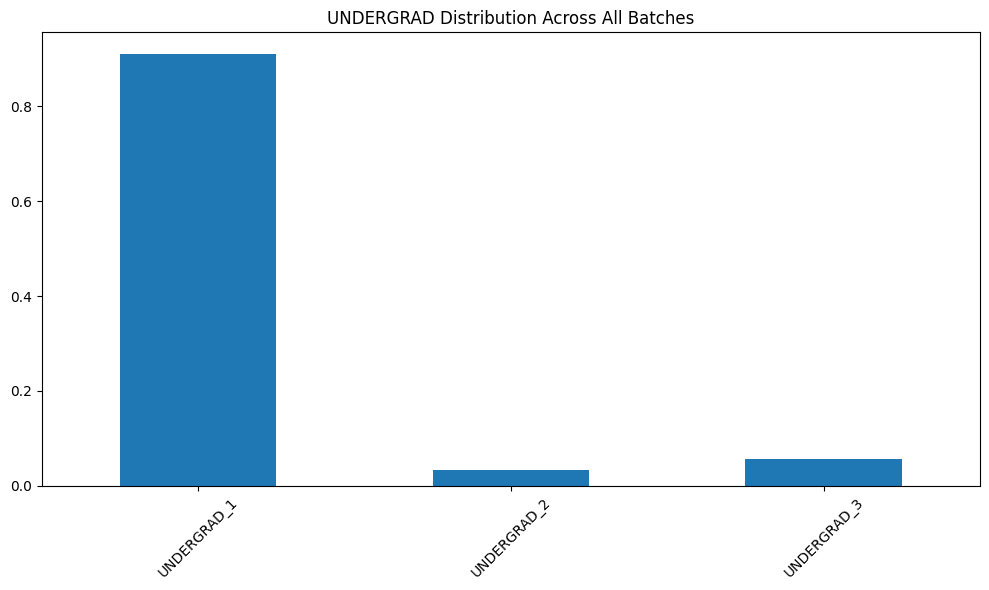

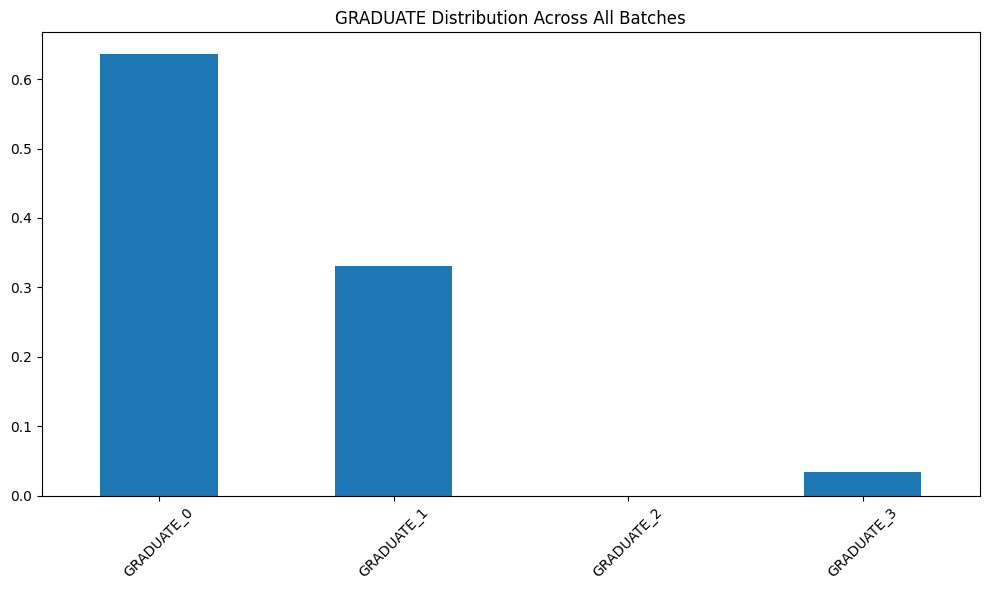

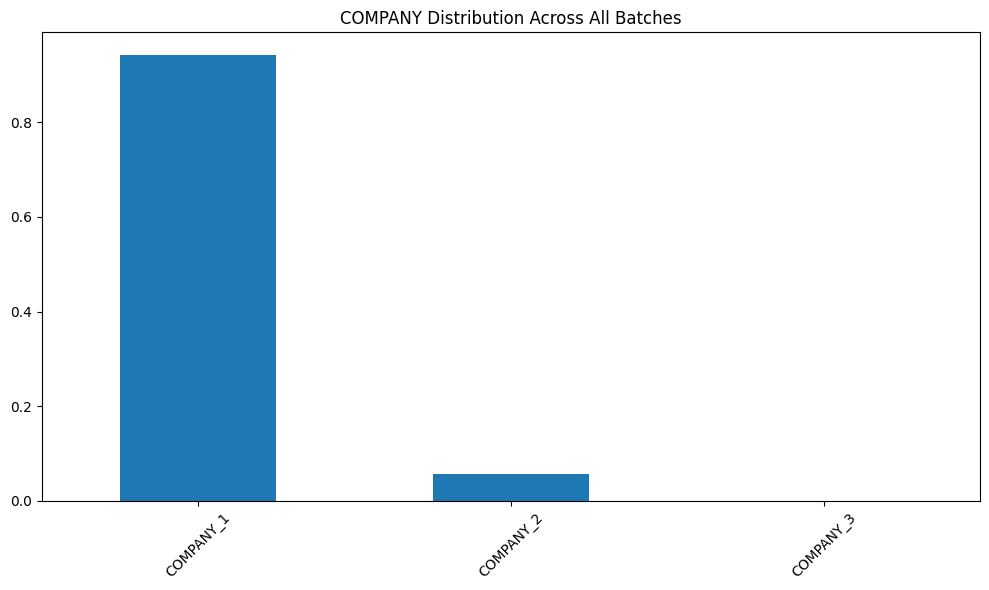

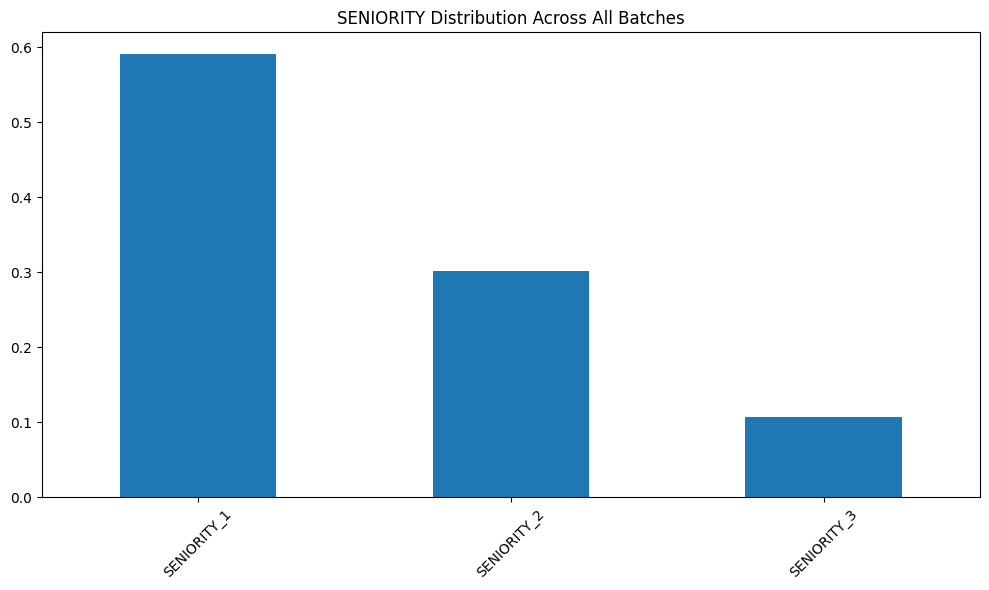

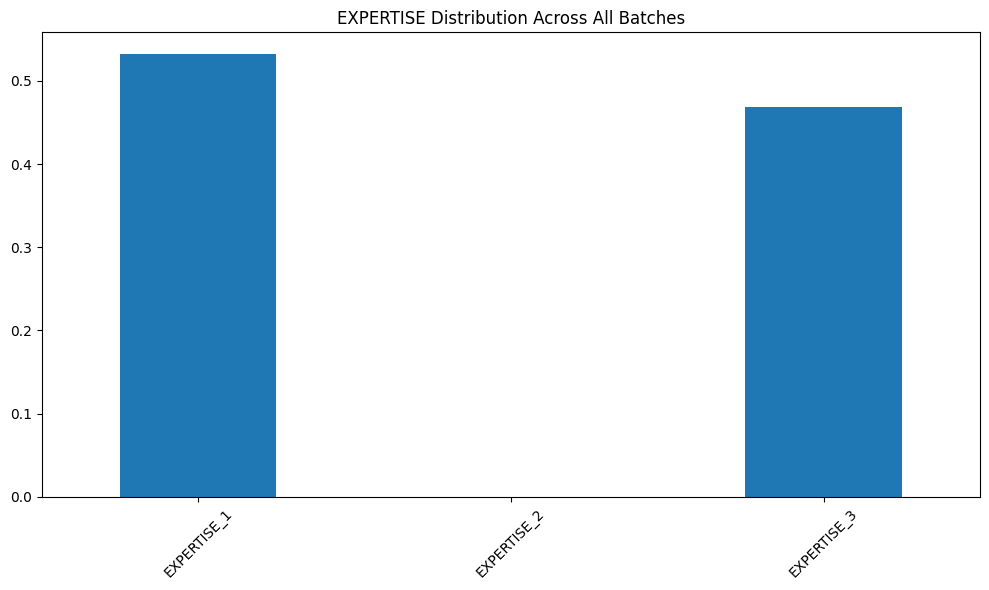

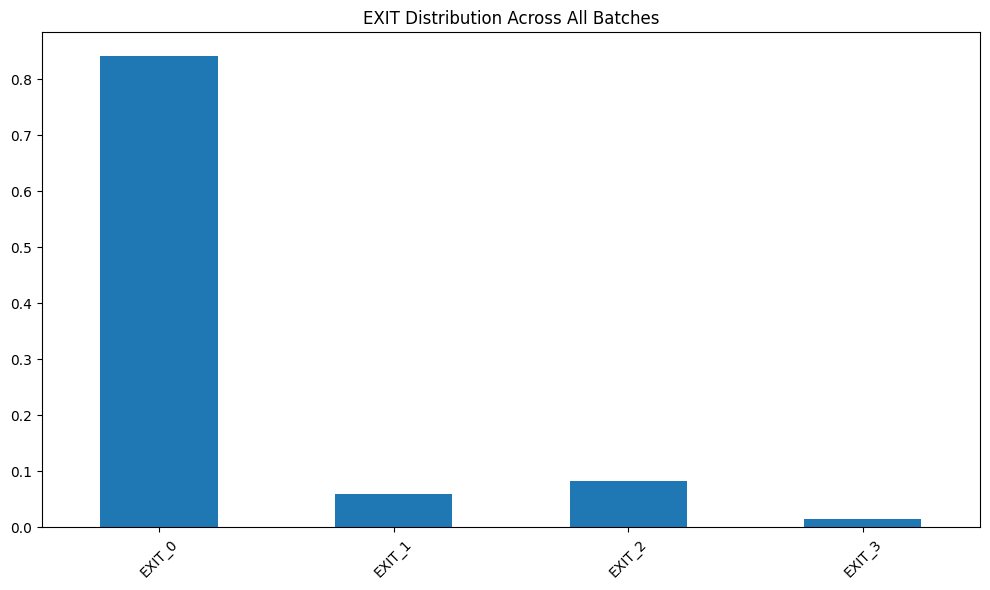

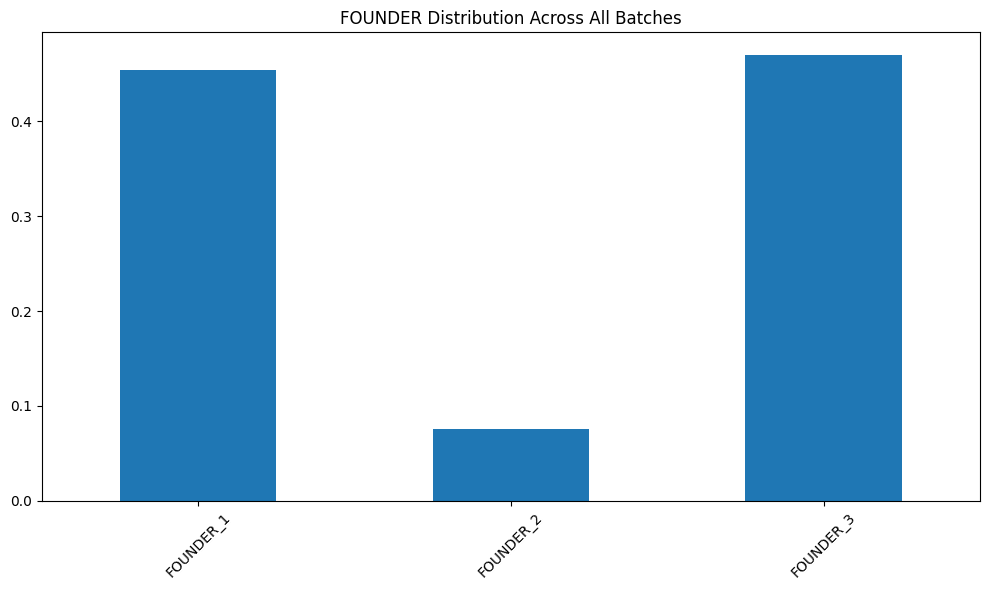

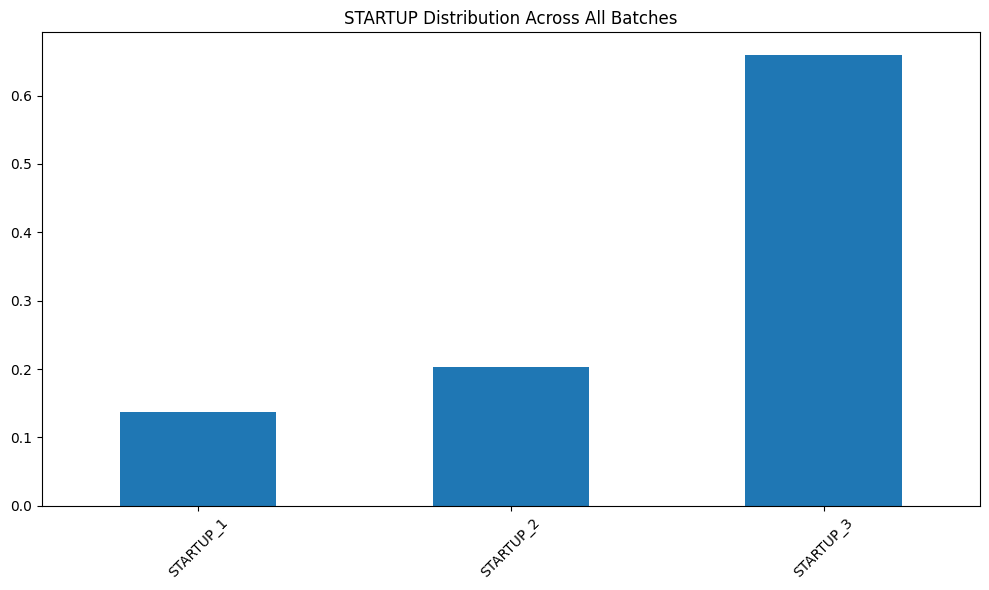

<Figure size 1000x600 with 0 Axes>

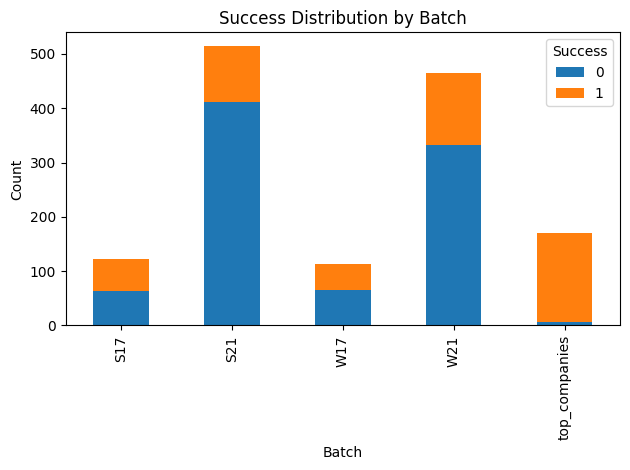

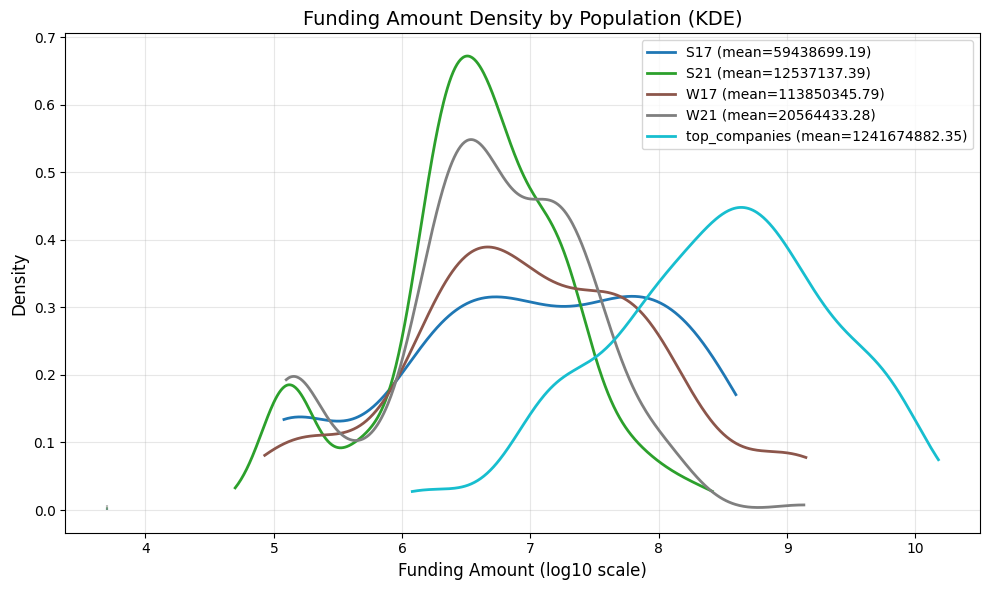

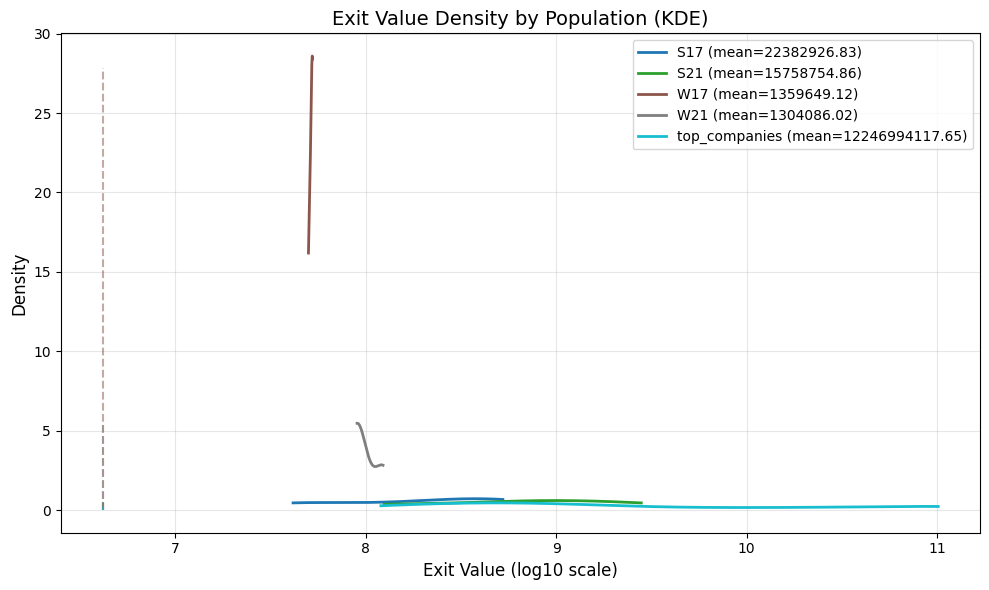

/Users/Viresh/Desktop/Spring 2025/Angel Network/founder-rank/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/Viresh/Desktop/Spring 2025/Angel Network/founder-rank/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


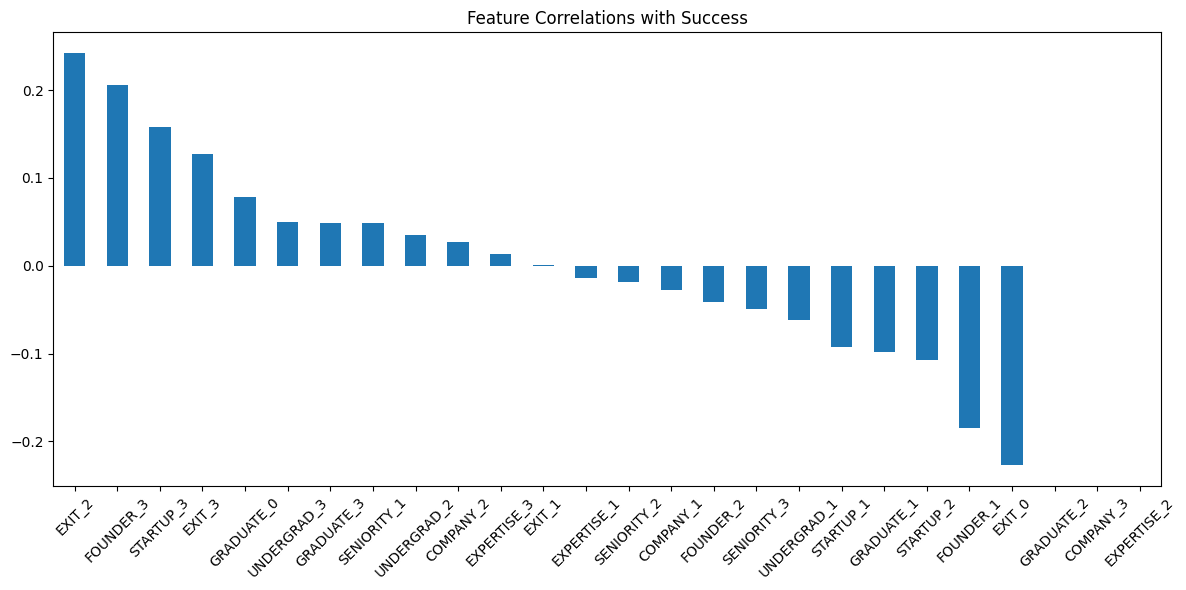

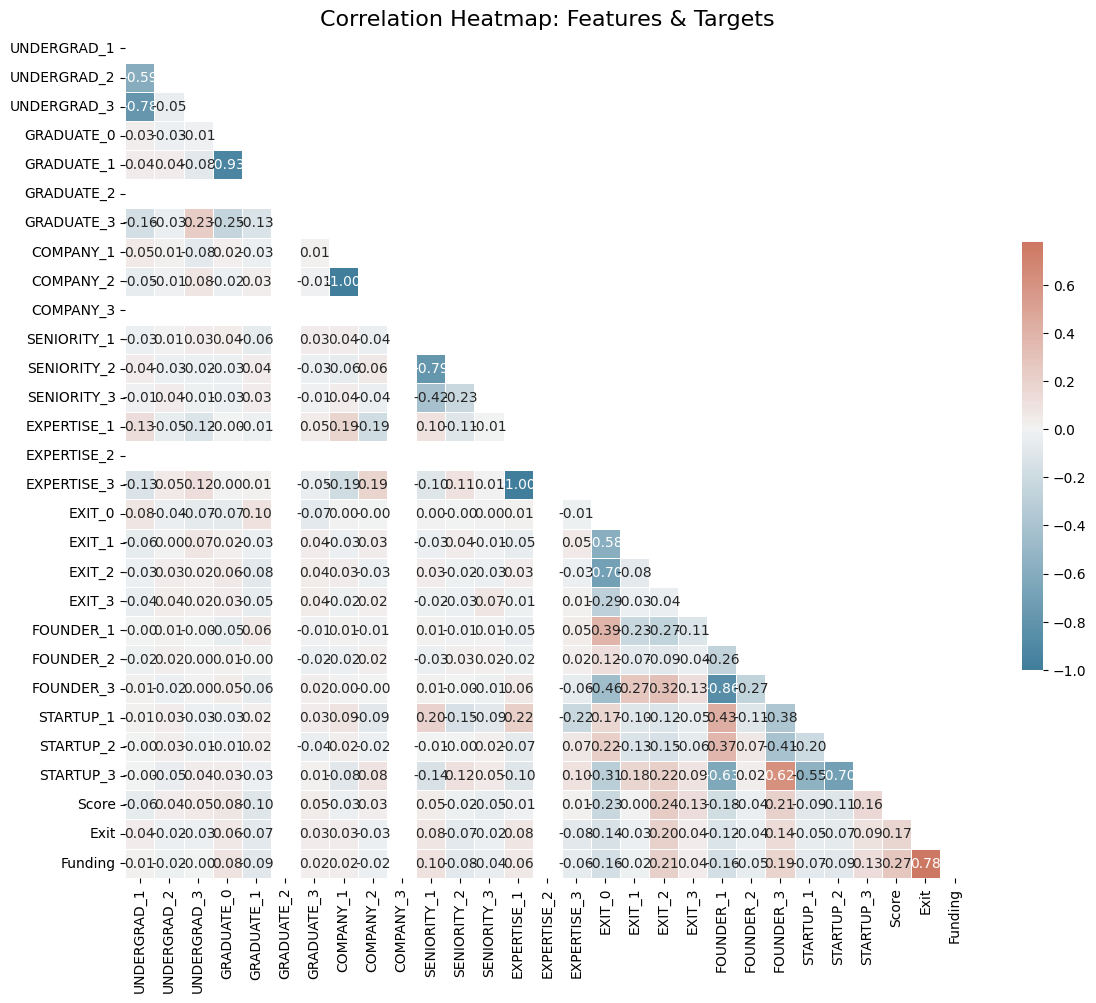

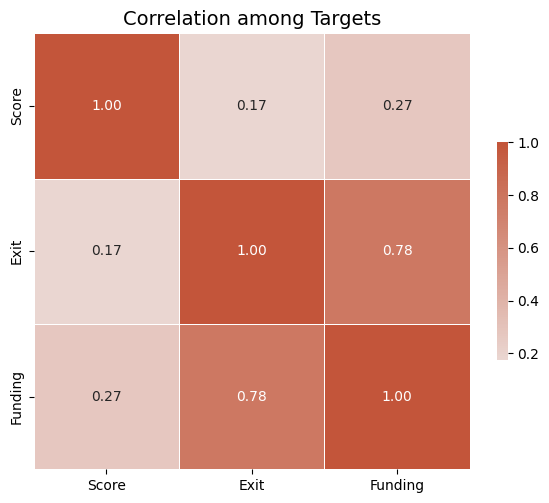

In [5]:
batch_codes = ['S21', 'W21', 'S17', 'W17', 'top_companies']

df = load_batch_data(batch_codes)
analyze_batch_data(df)